### Esse projeto consiste em fazer uma análise de dados relacionadas a exoplanetas. Vamos explorar como se deu a descoberta ao longo dos anos, o tipo de deteccção e algumas outras análises físicas. Em muitos gráficos vamos utilizar escala logarítmica em pelo menos um dos eixos.

####A base de dados utilizada foi retirada do archive oficial da Nasa: https://exoplanetarchive.ipac.caltech.edu/


1 - Histograma de ano de descoberta, a ideia é que a partir do ano da missão kepler os numeros aumentem significativamente\
2 - Histograma da missão de descoberta\
3 - Método de descoberta\
4 - Massa dos planetas descobertos\
5 - Período dos planetas descobertos e justificativa de porque tantos Hot Jupiters \
6 - Massa dos planetas em Mj \
7 - Massa das estrelas em Ms\
8 - Star mass vs Orbital Period\
9 - Star age vs Orbital Period\
10 - Star metallicity vs Orbital Period\
11 - Mapa de cor de correlações\
12 -Planet Publication Status histograma\
13 -Planet Mass Detection Type\
14 - Distance to Host Star


In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Carregando o dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Senac/PS_2023.01.05_05.21.00.csv", sep =',')

In [3]:
#Verificando a quantidade de linhas e colunas da tabela
df.shape

(33855, 28)

In [4]:
#Verificando os tipos dos dados
df.dtypes

pl_name             object
sy_snum              int64
sy_pnum              int64
discoverymethod     object
disc_year            int64
disc_facility       object
disc_telescope      object
disc_instrument     object
soltype             object
pl_orbper          float64
pl_orbsmax         float64
pl_massj           float64
pl_bmassj          float64
pl_orbeccen        float64
pl_insol           float64
pl_eqt             float64
pl_trandur         float64
st_spectype         object
st_teff            float64
st_rad             float64
st_mass            float64
st_met             float64
st_metratio         object
st_age             float64
ra                 float64
dec                float64
sy_dist            float64
sy_gaiamag;         object
dtype: object

In [5]:
#Significado de cada coluna:

# COLUMN pl_name:        Planet Name
# COLUMN sy_snum:        Number of Stars
# COLUMN sy_pnum:        Number of Planets
# COLUMN discoverymethod: Discovery Method
# COLUMN disc_year:      Discovery Year
# COLUMN disc_facility:  Discovery Facility
# COLUMN disc_telescope: Discovery Telescope
# COLUMN disc_instrument: Discovery Instrument
# COLUMN soltype:        Solution Type
# COLUMN pl_orbper:      Orbital Period [days]
# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])
# COLUMN pl_massj:       Planet Mass [Jupiter Mass]
# COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]
# COLUMN pl_orbeccen:    Eccentricity
# COLUMN pl_insol:       Insolation Flux [Earth Flux]
# COLUMN pl_eqt:         Equilibrium Temperature [K]
# COLUMN pl_trandur:     Transit Duration [hours]
# COLUMN st_spectype:    Spectral Type
# COLUMN st_teff:        Stellar Effective Temperature [K]
# COLUMN st_rad:         Stellar Radius [Solar Radius]
# COLUMN st_mass:        Stellar Mass [Solar mass]
# COLUMN st_met:         Stellar Metallicity [dex]
# COLUMN st_metratio:    Stellar Metallicity Ratio
# COLUMN st_age:         Stellar Age [Gyr]
# COLUMN ra:             RA [deg]
# COLUMN dec:            Dec [deg]
# COLUMN sy_dist:        Distance [pc]
# COLUMN sy_gaiamag:     Gaia Magnitude

In [6]:
#Lendo as cinco primeiras linhas da tabela
df.head()

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,disc_telescope,disc_instrument,soltype,pl_orbper,...,st_teff,st_rad,st_mass,st_met,st_metratio,st_age,ra,dec,sy_dist,sy_gaiamag;
0,11 Com b,2,1,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,Published Confirmed,326.03000,...,4742.0,19.00,2.70,-0.35,[Fe/H],NaN,185.178779,17.793252,93.1846,4.4403800;
1,11 Com b,2,1,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,Published Confirmed,NaN,...,NaN,NaN,2.60,NaN,NaN,NaN,185.178779,17.793252,93.1846,4.4403800;
2,11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,Published Confirmed,516.22000,...,4340.0,24.08,1.80,0.04,[Fe/H],1.56,229.274595,71.823943,125.3210,4.5621600;
3,11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,Published Confirmed,NaN,...,NaN,NaN,1.70,NaN,NaN,NaN,229.274595,71.823943,125.3210,4.5621600;
4,11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,Published Confirmed,516.21997,...,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,229.274595,71.823943,125.3210,4.5621600;


In [7]:
#Removendo as linhas com exoplanetas de mesmo nome e mantendo apenas a primeira não repetida
df = df.drop_duplicates(subset='pl_name', keep='first')

In [8]:
#Agora temos exatamente a quantidade de exoplanetas confirmados na data de downlowad do dataset
df.shape

(5235, 28)

In [9]:
#Contabilizando os exoplanetas
df['pl_name'].value_counts()

11 Com b        1
Kepler-306 d    1
Kepler-313 b    1
Kepler-312 c    1
Kepler-312 b    1
               ..
K2-97 b         1
K2-95 b         1
K2-91 b         1
K2-90 c         1
xi Aql b        1
Name: pl_name, Length: 5235, dtype: int64

In [10]:
#Verificando o status final dos exoplanetas
df['soltype'].value_counts()

Published Confirmed                               3186
Kepler Project Candidate (q1_q17_dr25_koi)         293
Kepler Project Candidate (q1_q12_koi)              286
Kepler Project Candidate (q1_q17_dr24_koi)         281
Kepler Project Candidate (q1_q16_koi)              279
Kepler Project Candidate (q1_q17_dr25_sup_koi)     275
Kepler Project Candidate (q1_q8_koi)               234
Published Candidate                                202
TESS Project Candidate                             199
Name: soltype, dtype: int64

In [11]:
#Verificando o Método de deteccão dos Exoplanetas
df['discoverymethod'].value_counts()

Transit                          3941
Radial Velocity                  1022
Microlensing                      148
Imaging                            62
Transit Timing Variations          23
Eclipse Timing Variations          18
Orbital Brightness Modulation       9
Pulsar Timing                       7
Astrometry                          2
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: discoverymethod, dtype: int64

In [12]:
df['disc_year'].value_counts()

2016    1518
2014     875
2021     525
2022     331
2018     326
2020     233
2019     203
2015     157
2017     153
2012     139
2011     138
2013     126
2010      97
2009      94
2008      65
2007      52
2005      36
2006      31
2002      29
2004      27
2003      22
2000      16
1999      13
2001      12
1996       6
1998       6
1992       2
1995       1
1994       1
1997       1
Name: disc_year, dtype: int64

### **Fizemos um breve e necessário tratamento nos dados, agora podemos começar a plotar gráficos das situações de interesse.**

####**Vamos começar com o gráfico de descoberta de exoplanetas ao longo dos anos**

####**Para uma melhor visualização vamos deixar o eixo y em escala logarítimica**

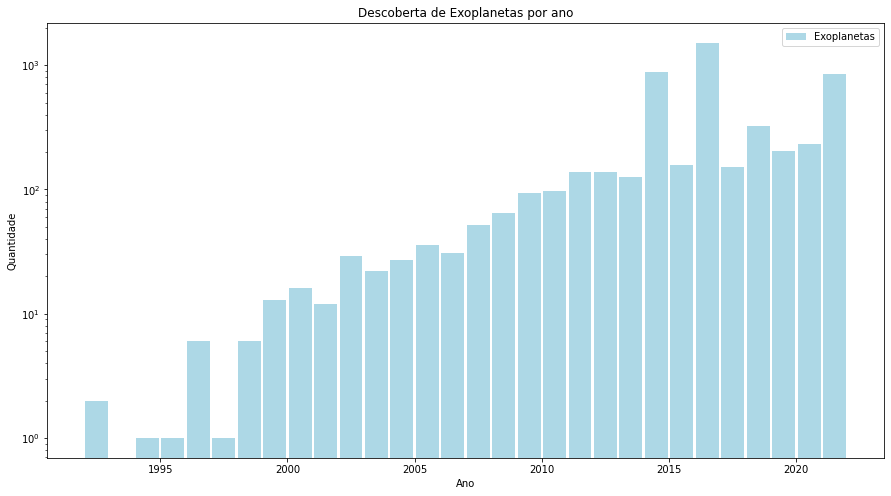

In [13]:
#Histograma da quantidade de exoplanetas descobertos por ano
ano = df.disc_year
plt.figure(figsize=(15, 8))
#bins = np.arange(1995,2024,1)
plt.hist(ano, label ='Exoplanetas', color = 'lightblue', bins =30, rwidth=0.9)
plt.title("Descoberta de Exoplanetas por ano")
plt.yscale("log")
#plt.xticks(np.arange(1992, 2022, step=1))
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

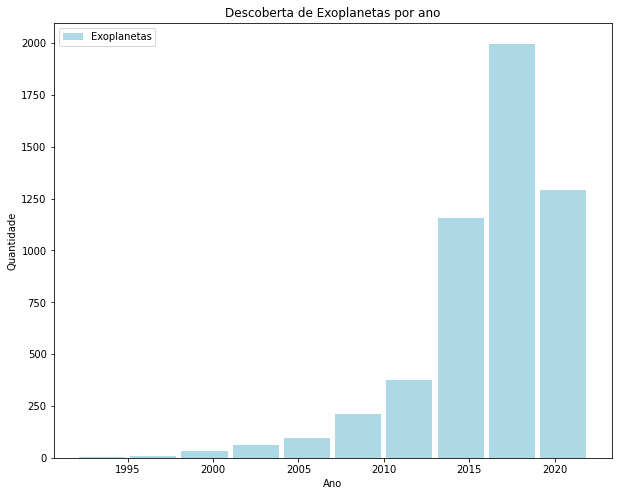

In [14]:
#Histograma da quantidade de exoplanetas descobertos por ano
ano = df.disc_year
plt.figure(figsize=(10, 8))
plt.hist(ano, label ='Exoplanetas', color = 'lightblue', rwidth=0.9)
plt.title("Descoberta de Exoplanetas por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

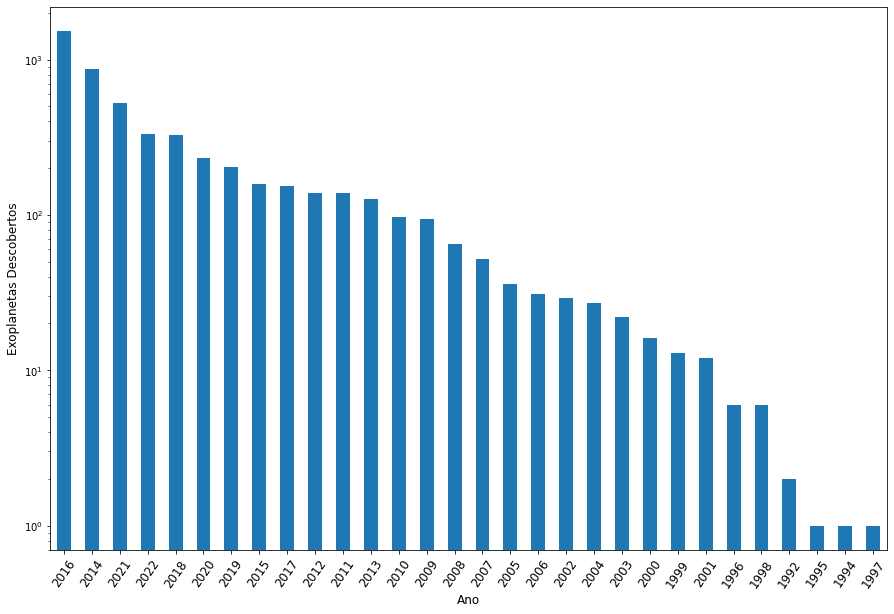

In [15]:
#Gráfico da quantidade de exoplanetas descobertos por ano
plt.figure(figsize=(15, 10))
df['disc_year'].value_counts().plot.bar()
plt.yscale("log")
plt.xticks(rotation =55, fontsize=12)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Exoplanetas Descobertos", fontsize=12)
plt.show()

In [16]:
df['discoverymethod'].value_counts()

Transit                          3941
Radial Velocity                  1022
Microlensing                      148
Imaging                            62
Transit Timing Variations          23
Eclipse Timing Variations          18
Orbital Brightness Modulation       9
Pulsar Timing                       7
Astrometry                          2
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: discoverymethod, dtype: int64

### **Há diversas formas de detecção de exoplanetas, onde as mais comuns são Trânsito Planetário e Velocidade Radial.**

### **De maneira simplificada a detecção por trânsito se dá ao analisar as curvas de luz da estrela e verificar uma diminuição periodica da curva de luz. Já o método de velocidade radial consiste na detecção da variação da velocidade radial da estrela, causando um Efeito Doppler, com isso as linhas espectrais sofrem blueshift e redshift.** 

####Para mais informações: https://pt.wikipedia.org/wiki/M%C3%A9todos_de_detec%C3%A7%C3%A3o_de_exoplanetas

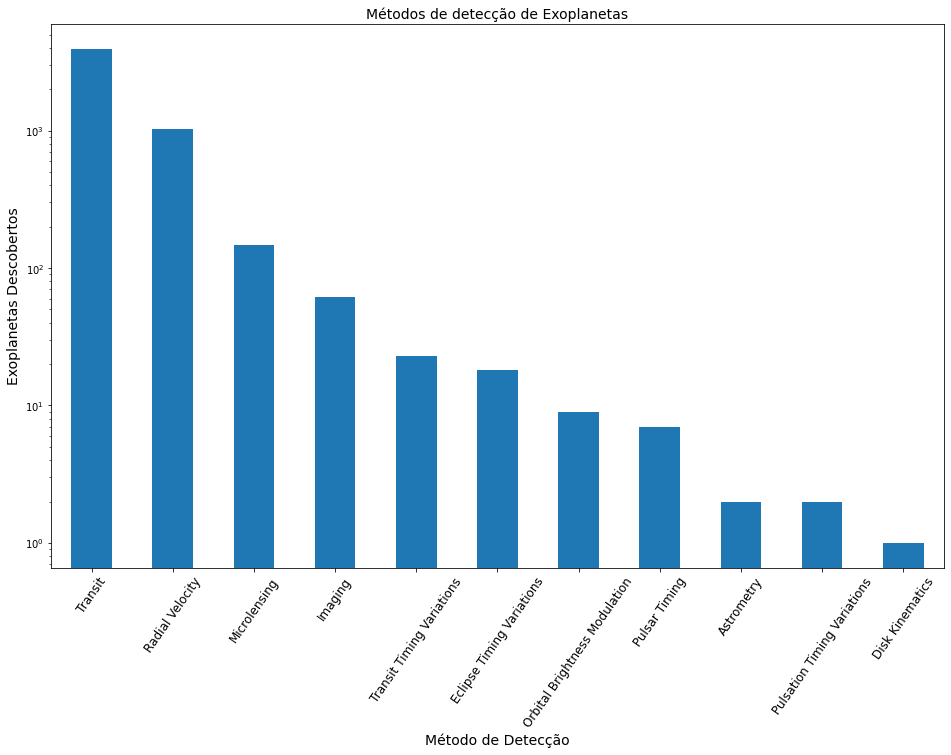

In [17]:
#Gráfico da quantidade de exoplanetas descobertos por cada método de detecção
plt.figure(figsize=(16, 10))
df['discoverymethod'].value_counts().plot.bar()
plt.yscale("log")
plt.xticks(rotation =55, fontsize=12)
plt.xlabel("Método de Detecção", fontsize=14)
plt.ylabel("Exoplanetas Descobertos", fontsize=14)
plt.title("Métodos de detecção de Exoplanetas", fontsize=14)
plt.show()

### **Os exoplanetas foram descobertos através de diferentes instrumentos.**

### **A seguir vemos cada telescopio que contribuiu e a quantidade de exoplanetas descobertos por cada um.**

In [18]:
#Verificando a quantidade de planetas descobertas por cada telescópio/missão espacial.
df['disc_facility'].value_counts()

Kepler                                          2710
K2                                               543
Transiting Exoplanet Survey Satellite (TESS)     285
Multiple Observatories                           273
La Silla Observatory                             270
                                                ... 
Leoncito Astronomical Complex                      1
NASA Infrared Telescope Facility (IRTF)            1
KOINet                                             1
SPECULOOS Southern Observatory                     1
Winer Observatory                                  1
Name: disc_facility, Length: 67, dtype: int64

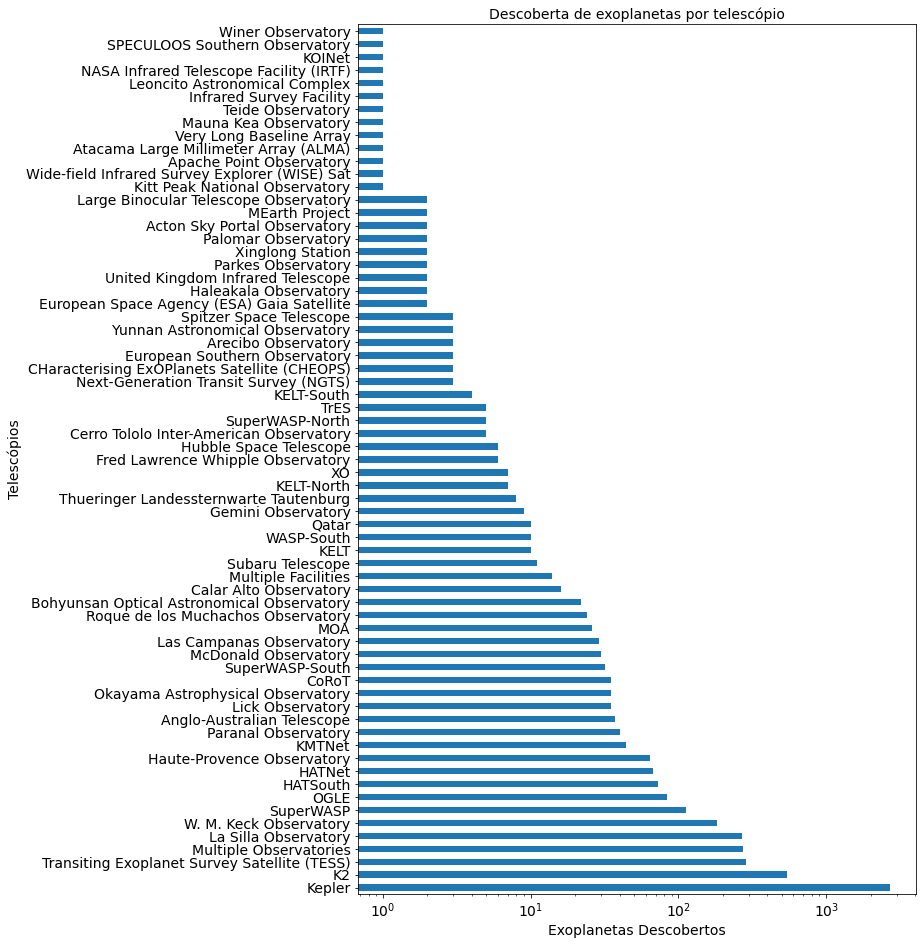

In [19]:
#Gráfico da quantidade de exoplanetas descobertos por cada telescópio
plt.figure(figsize=(10,16))
#df['disc_facility'].value_counts().plot.bar(fontsize=14)
df['disc_facility'].value_counts().plot(kind ='barh', fontsize=14)
plt.xscale("log")
#plt.xticks(rotation =90, fontsize=12)
plt.ylabel("Telescópios", fontsize=14)
plt.xlabel("Exoplanetas Descobertos", fontsize=14)
plt.title("Descoberta de exoplanetas por telescópio", fontsize=14)
plt.show()

### **Uma das maneiras de identificar um objeto celeste é através de suas coordenadas, elas são chamadas de Ascensão Reta e Declinação.**

### **A seguir vemos um "mapa" da distribuição dos exoplanetas utilizando essas coordenadas.**

### Para mais informações: https://pt.wikipedia.org/wiki/Sistema_equatorial_de_coordenadas

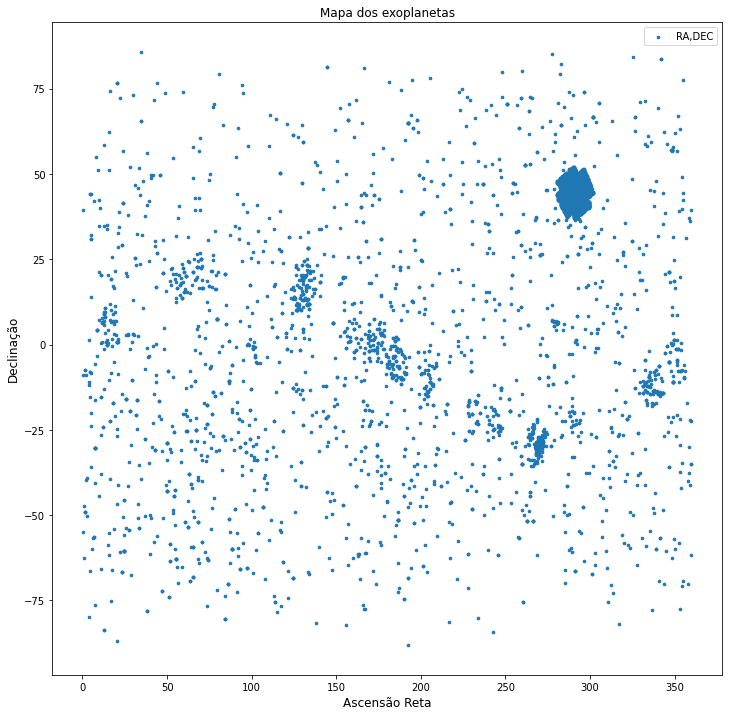

In [20]:
#Distribuição dos Planetas de acordo com Ascensão Reta e Declinação
ra = df.ra
dec = df.dec
fig = plt.figure(figsize=(12, 12))
plt.scatter(ra,dec, s=7, label="RA,DEC")
plt.xlabel("Ascensão Reta" ,fontsize =12)
plt.ylabel("Declinação", fontsize =12)
plt.title("Mapa dos exoplanetas", fontsize =12)
plt.legend(fontsize =10)
plt.show()

### **Há diversos parâmetros quando estamos fazendo uma análise de dados que é interessante fazer gráficos para exoplorar padrões e correlações.**

### **A seguir vamos começar por um gráfico de Período Orbital x Massa do Planeta.**

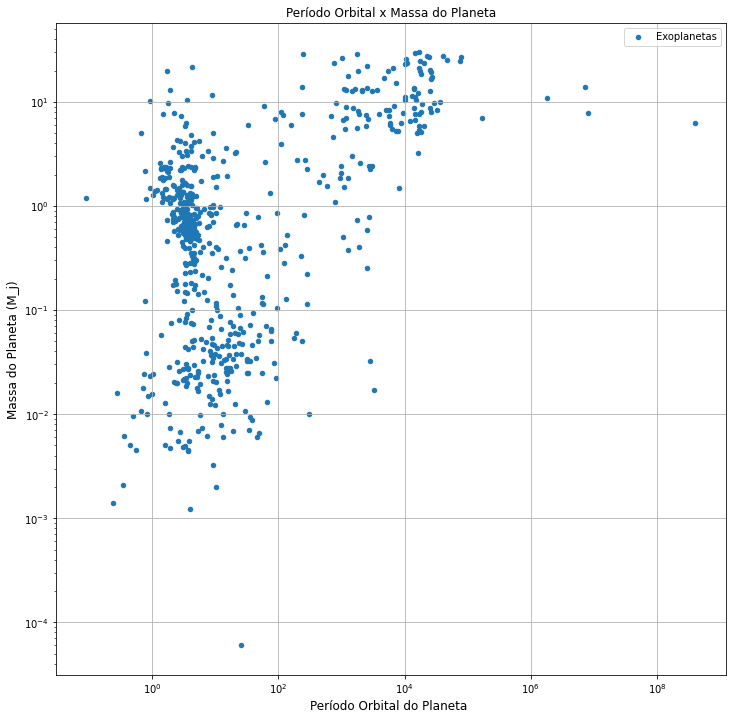

In [21]:
#Distribuição de período orbital por massa
pl_porb = df.pl_orbper
pl_mass = df.pl_massj
fig = plt.figure(figsize=(12, 12))
plt.scatter(pl_porb,pl_mass, s=20, label="Exoplanetas")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Período Orbital do Planeta " ,fontsize =12)
plt.ylabel("Massa do Planeta (M_j)", fontsize =12)
plt.title("Período Orbital x Massa do Planeta", fontsize =12)
plt.legend(fontsize =10)
plt.grid(True)
plt.show()

### **Ao analisar o gráfico acima vemos uma concentração maior de Exoplanetas com massa próximo a massa de Júpiter e período orbital menor que 100 dias.**

### **A explicação disso está na limitação tecnológica dos métodos de detecção. A maior fonte de deteccção, como já foi visto, foi através de trânsito planetário. Nessa forma é muito mais fácil encontrar planetas com períodos de curta duração e grandes massas, esses são conhecidos como Júpiters Quentes.**

### **A seguir vamos mostrar um histograma da distribuição da massa dos exoplanetas em relação a massa de júpiter. Vamos ver que a grande maioria dos planetas descobertos tem até 5 massas de Júpiter**

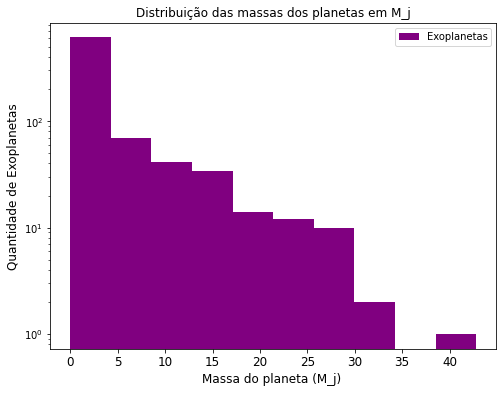

In [22]:
#Histograma das massas dos planetas em relação a massas de Júpiter
planet_mass = df['pl_massj']
plt.figure(figsize=(8, 6))
plt.hist(planet_mass, label ="Exoplanetas", color = "purple")
plt.xlabel("Massa do planeta (M_j) " ,fontsize =12)
plt.ylabel("Quantidade de Exoplanetas", fontsize =12)
plt.yscale("log")
plt.title("Distribuição das massas dos planetas em M_j", fontsize =12)
plt.xticks(np.arange(0, 45,5),fontsize=12)
plt.legend()
plt.show()

duração transitos
pl_trandur

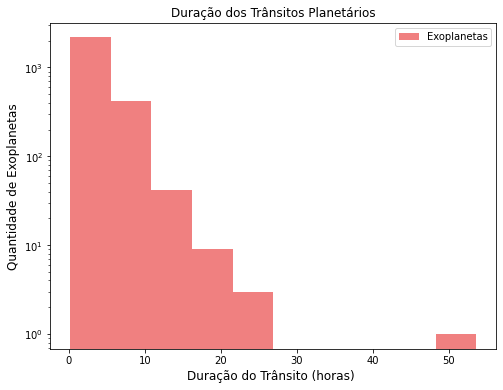

In [83]:
#Histograma da duração dos Trânsitos Planetários
planet_transdur = df['pl_trandur']
plt.figure(figsize=(8, 6))
plt.hist(planet_transdur, label ="Exoplanetas", color = "lightcoral")
plt.xlabel("Duração do Trânsito (horas) " ,fontsize =12)
plt.ylabel("Quantidade de Exoplanetas", fontsize =12)
plt.yscale("log")
plt.title("Duração dos Trânsitos Planetários", fontsize =12)
#plt.xticks(np.arange(0, 45,5),fontsize=12)
plt.legend()
plt.show()

In [23]:
# confirmed = df[df.soltype == 'Published Confirmed']

# ra, dec = df.ra, df.dec
# ra_c, dec_c = confirmed.ra, confirmed.dec
# fig = plt.figure(figsize=(12, 12))

# plt.scatter(ra, dec, s=3, label='Candidates')
# plt.scatter(ra_c, dec_c, s=3, label="Confirmed")

# plt.xlabel("Right Ascension")
# plt.ylabel("Declination")

# plt.legend()
# plt.show()

### **Um dos parâmetros conhecidos quando se estuda planetas e estrelas é a ecentricidade.**

### **Quanto mais próximo de zero for a ecentricidade, mais se aproxima de um círculo perfeito.**

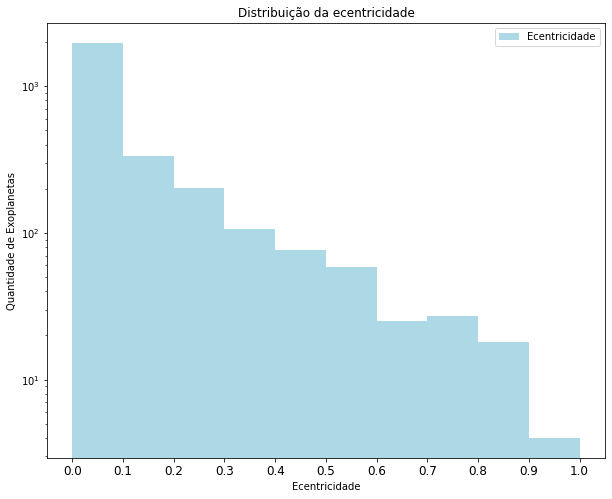

In [24]:
#Gráfico Ecentricidade dos Planetas
pl_ecc = df.pl_orbeccen
plt.figure(figsize=(10, 8))
plt.hist(pl_ecc,  label ='Ecentricidade', color = 'lightblue', bins=np.arange(0,1.1,0.1))
plt.title('Distribuição da ecentricidade')
plt.xlabel('Ecentricidade')
plt.yscale("log")
plt.ylabel("Quantidade de Exoplanetas")
plt.xticks(np.arange(0, 1.1, 0.1),fontsize=12)
plt.legend()
plt.show()
plt.show()

### **Vamos verificar a distribuição das temperaturas.**


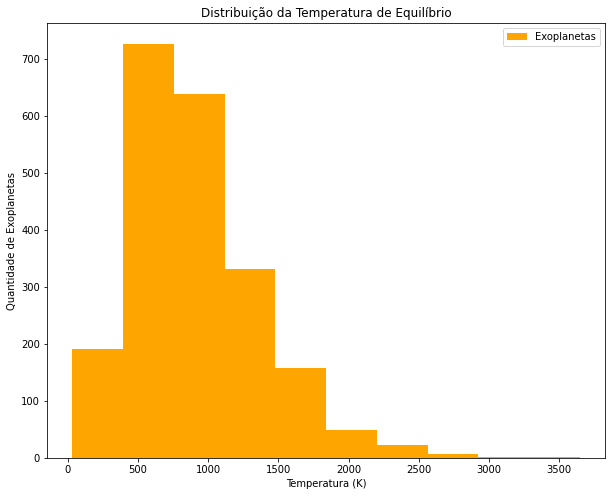

In [48]:
#Histograma distribuição de temperatura
pl_temp = df.pl_eqt
plt.figure(figsize=(10, 8))
plt.hist(pl_temp,  label ='Exoplanetas', color = 'orange')
plt.title('Distribuição da Temperatura de Equilíbrio')
plt.xlabel('Temperatura (K)')
plt.ylabel("Quantidade de Exoplanetas")
plt.legend()
plt.show()
plt.show()

### **Agora vamos verificar a relação entre Temperatura do exoplaneta e período orbital.**

### **Pela lógica, devemos esperar que quanto maior o período orbital, menor será a temperatura do exoplaneta. Lembre-se do nosso sistema solar, por exemplo.**

### **Obtemos exatamente o valor esperado, conforme o gráfico abaixo**

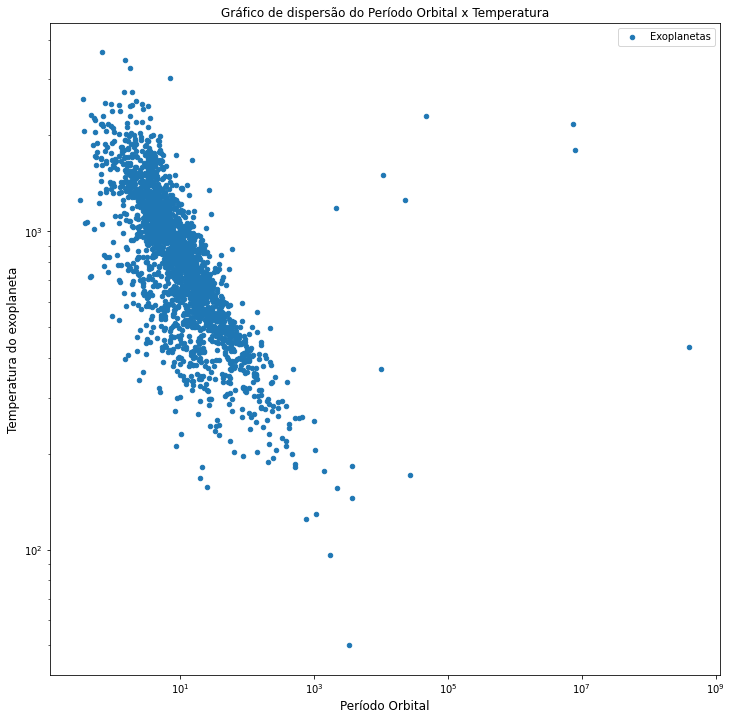

In [58]:
#Distribuição de período orbital por temperatura
pl_porb = df.pl_orbper
pl_temp = df.pl_eqt

fig = plt.figure(figsize=(12, 12))
plt.scatter(pl_porb, pl_temp, s=20, label="Exoplanetas")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Período Orbital" ,fontsize =12)
plt.ylabel("Temperatura do exoplaneta", fontsize =12)
plt.title("Gráfico de dispersão do Período Orbital x Temperatura", fontsize =12)
plt.legend(fontsize =10)
plt.show()

## **Vimos alguns parâmetros do exoplanetas.**

## **Agora vamos verificar também os parâmetros estelares.**

### **Verificando a massa das estrelas com exoplanetas em relação as massas solares.**

In [27]:
df['st_mass'].value_counts()

1.00    105
0.97     98
1.02     96
1.01     95
1.03     91
       ... 
3.75      1
2.39      1
1.84      1
2.12      1
3.09      1
Name: st_mass, Length: 235, dtype: int64

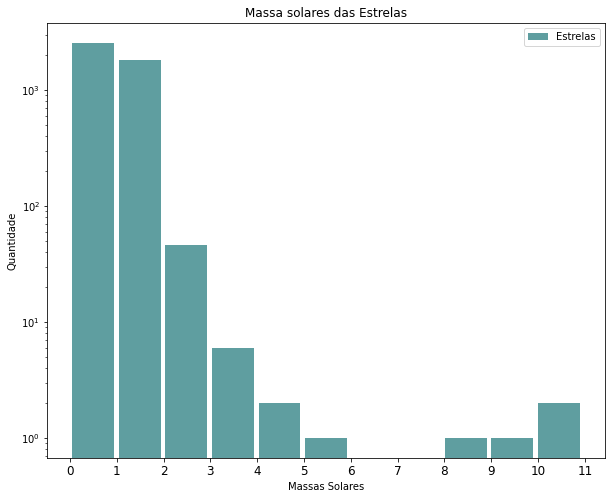

In [90]:
#Histograma da Massa das estrelas descobertas, a unidade está em massas solares
star_mass = df.st_mass
plt.figure(figsize=(10, 8))
plt.hist(star_mass, label ='Estrelas', color = 'cadetblue', rwidth=0.9, bins=11)
plt.title("Massa solares das Estrelas")
plt.xlabel("Massas Solares")
plt.xticks(np.arange(0, 12,1),fontsize=12)
plt.yscale("log")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

### **Vamos verificar a relação entre Massa Estelar e Temperatura Estelar.**

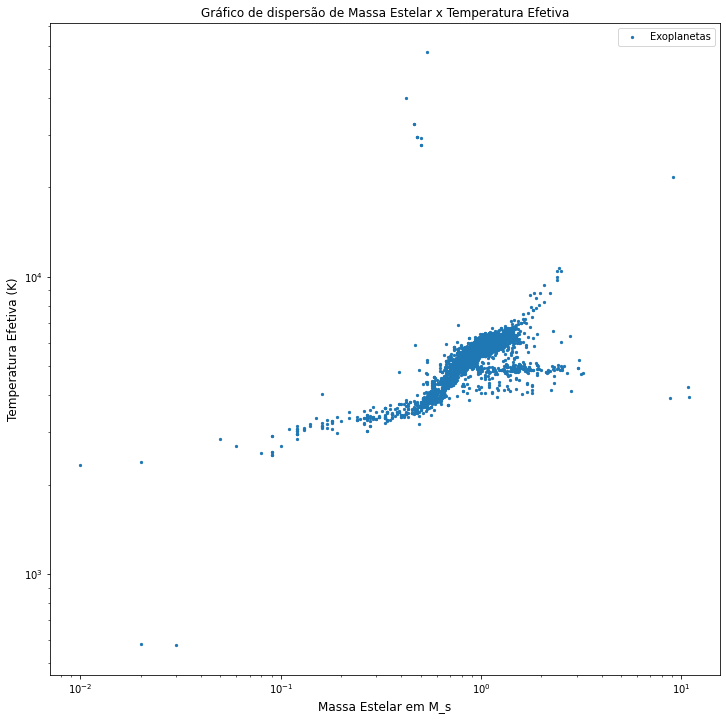

In [91]:
#Distribuição de Massa vs Temp
st_massa = df.st_mass
st_temp = df.st_teff

fig = plt.figure(figsize=(12, 12))
plt.scatter(st_massa,st_temp, s=5, label="Exoplanetas")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Massa Estelar em M_s", fontsize =12)
plt.ylabel("Temperatura Efetiva (K)" ,fontsize =12)
#plt.yticks(np.arange(0, 10000,2000),fontsize=12)
plt.title("Gráfico de dispersão de Massa Estelar x Temperatura Efetiva", fontsize =12)
plt.legend(fontsize =10)
plt.show()

### **Vamos criar um sub dataframe com as variáveis de interesse e chama-lo de 'df1'. Mas antes, para facilitar, vamos listar todas as colunas.**


In [29]:
df.columns.to_list()

['pl_name',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'disc_telescope',
 'disc_instrument',
 'soltype',
 'pl_orbper',
 'pl_orbsmax',
 'pl_massj',
 'pl_bmassj',
 'pl_orbeccen',
 'pl_insol',
 'pl_eqt',
 'pl_trandur',
 'st_spectype',
 'st_teff',
 'st_rad',
 'st_mass',
 'st_met',
 'st_metratio',
 'st_age',
 'ra',
 'dec',
 'sy_dist',
 'sy_gaiamag;']

In [30]:
df1 = df[['pl_orbper','pl_orbsmax',	'pl_massj','pl_orbeccen','pl_insol','pl_eqt','pl_trandur','st_spectype','st_teff','st_rad','st_mass','st_met','st_metratio','st_age']]

### **Com os dados podemos criar um mapa de calor para verificar as correlações.**


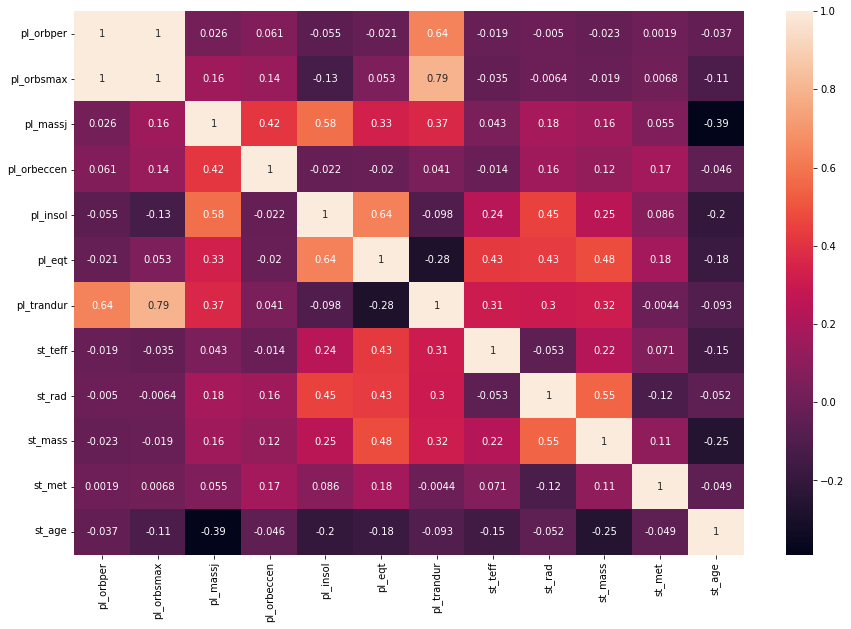

In [59]:
#Criando a matriz de correlações
#df1 = {df['sy_snum'],df['sy_pnum'],df['disc_year']}
correlacao = df1.corr()
ax = sns.heatmap(correlacao, annot = True)
sns.color_palette("pastel")
ax.figure.set_size_inches(15,10)

In [32]:
#Visualizando a matriz em forma de tabela
df1.corr()

,pl_orbper,pl_orbsmax,pl_massj,pl_orbeccen,pl_insol,pl_eqt,pl_trandur,st_teff,st_rad,st_mass,st_met,st_age
pl_orbper,1.000000,0.997282,0.025685,0.061348,-0.054913,-0.020796,0.639877,-0.018964,-0.004996,-0.023170,0.001876,-0.036534
pl_orbsmax,0.997282,1.000000,0.158253,0.141620,-0.134290,0.052736,0.794697,-0.034687,-0.006408,-0.018846,0.006774,-0.109353
pl_massj,0.025685,0.158253,1.000000,0.415107,0.578159,0.332437,0.367320,0.042952,0.181448,0.163101,0.055483,-0.389705
pl_orbeccen,0.061348,0.141620,0.415107,1.000000,-0.022232,-0.019597,0.040934,-0.014183,0.156371,0.121385,0.171055,-0.045774
pl_insol,-0.054913,-0.134290,0.578159,-0.022232,1.000000,0.635502,-0.098319,0.242421,0.452317,0.250152,0.086067,-0.200445
pl_eqt,-0.020796,0.052736,0.332437,-0.019597,0.635502,1.000000,-0.283002,0.425042,0.433314,0.480705,0.176444,-0.176299
pl_trandur,0.639877,0.794697,0.367320,0.040934,-0.098319,-0.283002,1.000000,0.305553,0.301627,0.315268,-0.004402,-0.093177
st_teff,-0.018964,-0.034687,0.042952,-0.014183,0.242421,0.425042,0.305553,1.000000,-0.052659,0.224991,0.070786,-0.148900
st_rad,-0.004996,-0.006408,0.181448,0.156371,0.452317,0.433314,0.301627,-0.052659,1.000000,0.548083,-0.117697,-0.051670
st_mass,-0.023170,-0.018846,0.163101,0.121385,0.250152,0.480705,0.315268,0.224991,0.548083,1.000000,0.114620,-0.253994


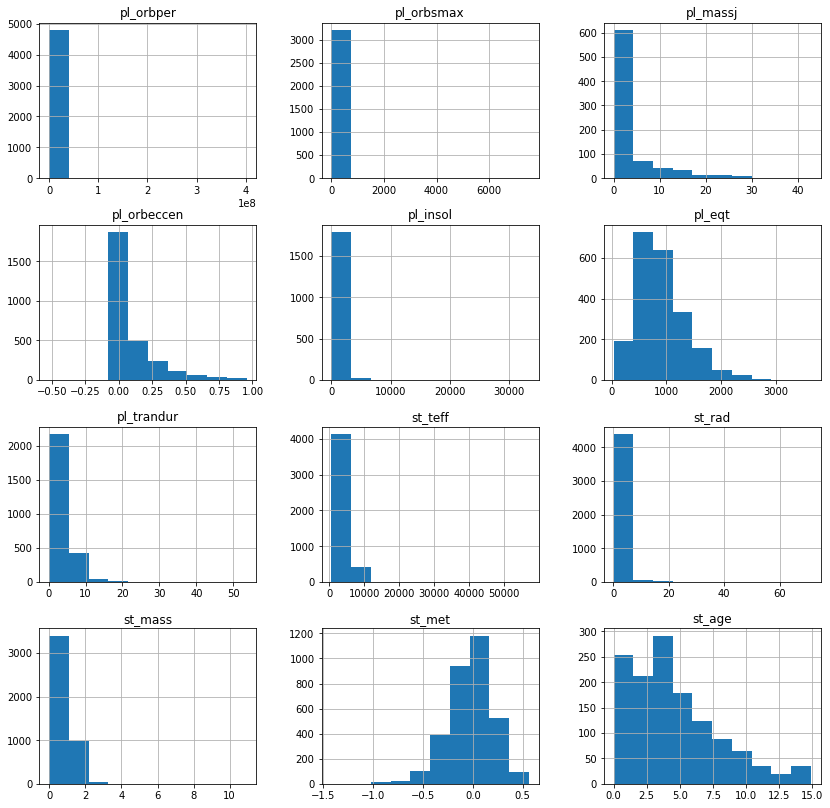

In [33]:
df1.hist(figsize=(14,14))
plt.show()